In [1]:
import pandas as pd

job_ads = pd.read_json('Testfil_FINAL_2.json')

## OLD

In [2]:
from nltk import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
import string

# Create a set of unique job ad descriptions
texts = set([t.lower() for t in job_ads['description_text'].tolist()])

# Create a stop_words set
stop_words = set(stopwords.words('swedish'))

# Tokenize the descriptions and remove stopwords and punctuations
tokens = [[w.translate(str.maketrans('', '', string.punctuation)) for w in word_tokenize(d) if not w in stop_words] for d in texts]

# Create an NLTK Text object from the tokens
text = Text([t for d in tokens for t in d])

## 1. Tokeniza, ta bort stopwords och punctuation

In [47]:
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize

description_text = job_ads['description_text']

sentences = []
seen_sentences = set()
for text in description_text:
    text_sentences = sent_tokenize(text.lower())
    for sentence in text_sentences:
        if sentence not in seen_sentences:
            sentences.append(sentence)
            seen_sentences.add(sentence)

# Create a stop_words set
stop_words = set(stopwords.words('swedish'))

# Tokenize the descriptions and remove stopwords and punctuations
tokens = [[w.translate(str.maketrans('', '', string.punctuation)) for w in word_tokenize(d) if not w in stop_words] for d in sentences]

# Create an NLTK Text object from the tokens
text = Text([t for d in tokens for t in d])

In [45]:
# Write sentences list to a text file
with open('sentences_test2.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(sentences))

## 2. Gör en KWIC och räkna vanligaste förekommande ord

In [57]:
from collections import Counter

# Define the keywords to search for
keywords = ['stark']

# Define the number of characters to show before and after the keyword
window_size = 1

for keyword in keywords:
    # Get the indices of all occurrences of the keyword
    indices = [i for i, w in enumerate(text) if w == keyword]

    # Define a list to store the KWIC for the keyword
    kwic = []

    # Generate the KWIC for each occurrence of the keyword
    for i in indices:
        left = ' '.join(text[i-window_size:i])
        right = ' '.join(text[i+1:i+window_size+1])
        kwic.append(left + ' ' + keyword + ' ' + right)

    # Identify the frequently occurring keywords in the KWIC output
    kwic_words = [w for s in kwic for w in s.split() if w != keyword and w.isalpha()]
    kwic_counter = Counter(kwic_words)
    print(f'Most common words in KWIC for "{keyword}":')
    for word, count in kwic_counter.most_common(10):
        print(f'{word}: {count}')

Most common words in KWIC for "stark":
vilja: 42
drivkraft: 29
tillväxt: 26
gemenskap: 18
företag: 16
team: 14
präglas: 13
teamkänsla: 13
person: 11
sammanhållning: 10


## 3. Sentiment-analys

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load the sentiment analyzers
sia = SentimentIntensityAnalyzer()

# Define a list to store the sentiment scores
sentiment_scores = []

# Define the keywords to search for
keywords = ['analys', 'analytisk', 'beslut', 'chef', 'driven', 'drivkraft', 'individer', 'kompetent', 'självständig', 'stark']

# Define the number of characters to show before and after the keyword
window_size = 15

# Iterate through each keyword
for keyword in keywords:
    # Get the indices of all occurrences of the keyword
    indices = [i for i, w in enumerate(text) if w == keyword]

    # Define a list to store the KWIC for the keyword
    kwic = []

    # Generate the KWIC for each occurrence of the keyword
    for i in indices:
        left = ' '.join(text[i-window_size:i])
        right = ' '.join(text[i+1:i+window_size+1])
        kwic.append(left + ' ' + keyword + ' ' + right)

    # Calculate the sentiment score for the KWICs
    kwic_sentiment_scores = []
    for kwic_text in kwic:
        sia_scores = sia.polarity_scores(kwic_text)
        tb_scores = TextBlob(kwic_text).sentiment
        # Combine the sentiment scores from the two analyzers
        compound_score = sia_scores['compound'] + tb_scores.polarity
        kwic_sentiment_scores.append(compound_score)

    # Check if there are any sentiment scores for the keyword
    if kwic_sentiment_scores:
        # Calculate the average sentiment score for the keyword
        avg_sentiment = sum(kwic_sentiment_scores) / len(kwic_sentiment_scores)
        sentiment_scores.append(avg_sentiment)
        print(f"Keyword: {keyword}, Sentiment score: {avg_sentiment:.3f}")
    else:
        print(f"No sentiment scores found for keyword: {keyword}")

# Calculate the average sentiment score if there are any sentiment scores
if sentiment_scores:
    avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
    print("Average sentiment score:", avg_sentiment_score)
else:
    print("No sentiment scores found for any keywords")


Keyword: analys, Sentiment score: 0.031
Keyword: analytisk, Sentiment score: 0.139
Keyword: beslut, Sentiment score: 0.046
Keyword: chef, Sentiment score: 0.031
Keyword: driven, Sentiment score: 0.148
Keyword: drivkraft, Sentiment score: 0.083
Keyword: individer, Sentiment score: 0.086
Keyword: kompetent, Sentiment score: 0.052
Keyword: självständig, Sentiment score: 0.104
Keyword: stark, Sentiment score: -0.138
Average sentiment score: 0.05812388760757177


In [15]:
import csv
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load the sentiment analyzers
sia = SentimentIntensityAnalyzer()

# Define a list to store the sentiment scores
sentiment_scores = []

# Define the keywords to search for
keywords = ['analys', 'analytisk', 'beslut', 'chef', 'driven', 'drivkraft', 'individer', 'kompetent', 'självständig', 'stark']

# Define the number of characters to show before and after the keyword
window_size = 15

# Define the path to your CSV file
csv_file_path = 'keyword_sentence_similarity.csv'

# Read the CSV file
with open(csv_file_path, 'r') as file:
    reader = csv.DictReader(file)
    fieldnames = reader.fieldnames + ['Sentiment']
    rows = list(reader)

# Iterate through each keyword
for keyword in keywords:
    # Get the indices of all occurrences of the keyword
    indices = [i for i, w in enumerate(text) if w == keyword]

    # Define a list to store the KWIC for the keyword
    kwic = []

    # Generate the KWIC for each occurrence of the keyword
    for i in indices:
        left = ' '.join(text[i-window_size:i])
        right = ' '.join(text[i+1:i+window_size+1])
        kwic.append(left + ' ' + keyword + ' ' + right)

    # Calculate the sentiment score for the KWICs
    kwic_sentiment_scores = []
    for kwic_text in kwic:
        sia_scores = sia.polarity_scores(kwic_text)
        tb_scores = TextBlob(kwic_text).sentiment
        # Combine the sentiment scores from the two analyzers
        compound_score = sia_scores['compound'] + tb_scores.polarity
        kwic_sentiment_scores.append(compound_score)

    # Check if there are any sentiment scores for the keyword
    if kwic_sentiment_scores:
        # Calculate the average sentiment score for the keyword
        avg_sentiment = sum(kwic_sentiment_scores) / len(kwic_sentiment_scores)
        sentiment_scores.append(avg_sentiment)
        print(f"Keyword: {keyword}, Sentiment score: {avg_sentiment:.3f}")

        # Update the 'Sentiment' column in the rows list
        for row in rows:
            if keyword in row['Keyword']:
                row['Sentiment'] = format(avg_sentiment, '.3f')
    else:
        print(f"No sentiment scores found for keyword: {keyword}")

# Save the updated rows to the CSV file
with open('keyword_sentence_similarity_2.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(rows)

# Calculate the average sentiment score if there are any sentiment scores
if sentiment_scores:
    avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
    print("Average sentiment score:", format(avg_sentiment_score, '.3f'))
else:
    print("No sentiment scores found for any keywords")


Keyword: analys, Sentiment score: 0.031
Keyword: analytisk, Sentiment score: 0.139
Keyword: beslut, Sentiment score: 0.046
Keyword: chef, Sentiment score: 0.031
Keyword: driven, Sentiment score: 0.148
Keyword: drivkraft, Sentiment score: 0.083
Keyword: individer, Sentiment score: 0.086
Keyword: kompetent, Sentiment score: 0.052
Keyword: självständig, Sentiment score: 0.104
Keyword: stark, Sentiment score: -0.138
Average sentiment score: 0.058


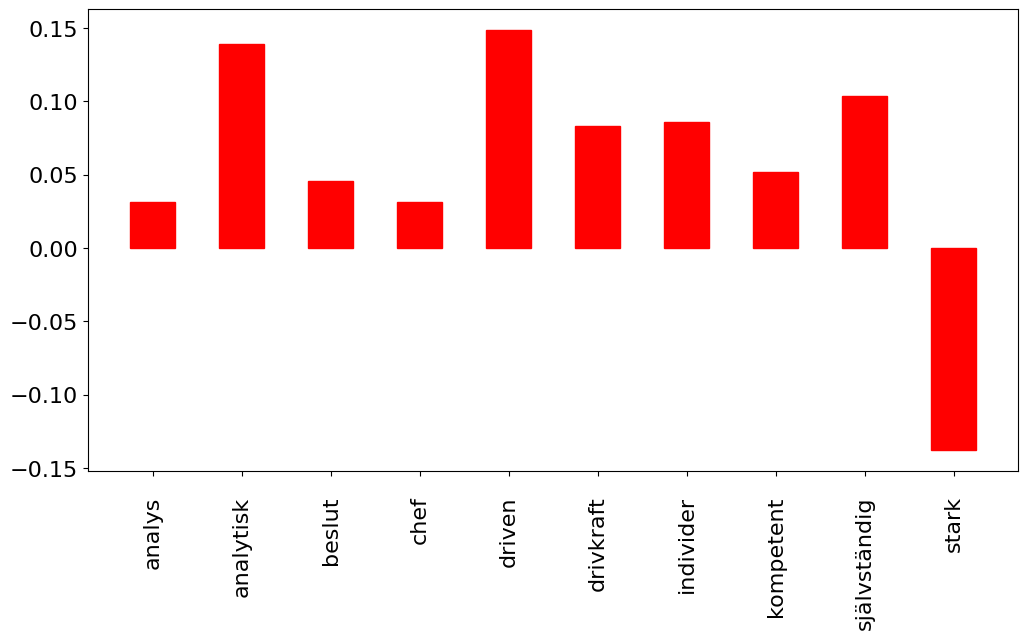

In [4]:
import matplotlib.pyplot as plt

# Define the manually selected words for the red and green columns
red_words = ['analys', 'analytisk', 'beslut', 'chef', 'driven', 'drivkraft', 'individer', 'kompetent', 'självständig', 'stark']
green_words = ['utredning', 'test', 'data', 'systematisk', 'val', 'slutsatser', 'omdöme', 'agera', 'ledare', 'motiverad', 'inspirerad', 'fokuserad', 'initiativförmåga', 'inspiration', 'energi', 'personer', 'människor', 'kunnig', 'självgående', 'stabil', 'solid']

# Filter out keywords that have no sentiment score
data = [(kw, score) for kw, score in zip(keywords, sentiment_scores) if score is not None]

# Separate the filtered data into two lists, for red and green columns
red_data = [(kw, score) for kw, score in data if kw in red_words]
green_data = [(kw, score) for kw, score in data if kw in green_words]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(data)), [x[1] for x in data], align='center', width=0.5)
ax.set_xticks(range(len(data)))
ax.set_xticklabels([x[0] for x in data], fontsize=12)
ax.tick_params(axis='x', labelrotation=90, labelsize=16, pad=14)
ax.tick_params(axis='y', labelsize=16)

# Color the bars for the red and green words differently
for i, (kw, score) in enumerate(data):
    if kw in red_words:
        ax.get_children()[i].set_color('red')
    elif kw in green_words:
        ax.get_children()[i].set_color('green')

plt.show()

In [155]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('keyword_sentence_similarity.csv')

# Define the sentiment analyzers
sia = SentimentIntensityAnalyzer()

# Define a function to analyze the sentiment of a group of sentences for a keyword
def analyze_keyword_sentiment(keyword, sentences):
    # Define a list to store the sentiment scores
    sentiment_scores = []

    # Iterate through each sentence in the group of sentences
    for sentence in sentences:
        # Calculate the sentiment score for the sentence using both analyzers
        sia_scores = sia.polarity_scores(sentence)
        tb_scores = TextBlob(sentence).sentiment
        compound_score = sia_scores['compound'] + tb_scores.polarity
        sentiment_scores.append(compound_score)

    # Calculate the average sentiment score for the group of sentences
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    return avg_sentiment

# Iterate through each keyword in the data
for keyword in df['Keyword'].unique():
    # Get the group of sentences for the keyword
    sentences = df[df['Keyword'] == keyword]['Sentence'].tolist()

    # Analyze the sentiment of the group of sentences for the keyword
    avg_sentiment = analyze_keyword_sentiment(keyword, sentences)

    # Print the results
    print(f"Keyword: {keyword}, Sentiment score: {avg_sentiment:.3f}")

# Calculate the sentiment scores for each keyword and add them to a new column 'Sentiment'
df['Sentiment'] = df.apply(lambda row: analyze_keyword_sentiment(row['Keyword'], row['Sentence'].split('\n')), axis=1)

# Save the updated DataFrame to the same CSV file
df.to_csv('keyword_sentence_similarity2.csv', index=False)

Keyword: stark, Sentiment score: -0.200
Keyword: drivkraft, Sentiment score: -0.133
Keyword: chef, Sentiment score: 0.000
Keyword: analys, Sentiment score: 0.000
Keyword: analytisk, Sentiment score: 0.273
Keyword: driven, Sentiment score: 0.000
Keyword: individer, Sentiment score: 0.000
Keyword: beslut, Sentiment score: 0.000
Keyword: kompetent, Sentiment score: 0.000
Keyword: självständig, Sentiment score: 0.000
